In [120]:
from time import time

start = time()

## Regex classifier

In [121]:
from sklearn.base import BaseEstimator, RegressorMixin
import numpy as np
import re


#idea credit https://www.linkedin.com/pulse/regex-one-pattern-rule-them-all-find-bring-darkness-bind-carranza/
class RegexClassifier(BaseEstimator, RegressorMixin):
    """
    Language Classifier using Regular Expressions
    """

    language_regex_dict = {
        'el': r'([\u0370-\u03FF]+)\s?',  # Greek
        'en': r'([a-zA-Z]+)\s?',  # English
    }

    # STATIC INITALIZATION BLOCK
    # pre-compie all expressions to save execution time
    for lang in language_regex_dict.keys():
        language_regex_dict[lang] = re.compile(language_regex_dict[lang])


    def __init__(self, include_greeklish=True):
        """
        Initialize a new :class:`RegexClassifier` instance.

        :param include_greeklish: Optional. If True, include Greeklish in the language identification process.
        """
        self.include_greeklish = include_greeklish

    def predict(self, x):
        preds = []

        for text in x:
            pred = "other"

            if self.include_greeklish and \
                re.search(RegexClassifier.language_regex_dict["el"], text) and \
                re.search(RegexClassifier.language_regex_dict["en"], text):
                    pred = "greeklish"

            for lang_code, regex_pattern in RegexClassifier.language_regex_dict.items():
                match = re.search(regex_pattern, text)
                if match:
                    pred = lang_code
                    break
            preds.append(pred)
        return np.array(preds)
    
    def fit(self, x, y):
        return self

In [122]:
# Example usage
user_input_text = ["‰Ω†Â•ΩÔºå„Åì„Çå„ÅØ„Çµ„É≥„Éó„É´„Åß„Åô„ÄÇÏïàÎÖïÌïòÏÑ∏Ïöî", "this is an english sentence", "Œ¥ŒµŒΩ Œ±ŒΩœÑŒµœáœâ Œ±ŒªŒªŒø"]
detected_language = RegexClassifier().predict(user_input_text)
print(f"Detected Language Code: {detected_language}")

Detected Language Code: ['other' 'en' 'el']


## Defining the Gold Standard


### Greek-English identification dataset

https://aclanthology.org/L06-1229/
https://aclanthology.org/L04-1369/
https://huggingface.co/datasets/papluca/language-identification

In [123]:
import pandas as pd


def dataset_to_pd(dataset_dict: dict) -> pd.DataFrame:
    df_ls = []
    label_array = np.empty(shape=(sum([len(dataset) for dataset in dataset_dict.values()])), dtype=object)
    last_idx = -1

    for label, dataset in dataset_dict.items():
        new_last_idx = len(dataset) + last_idx
        label_array.put(np.arange(last_idx+1, new_last_idx+1, 1), label)
        last_idx = new_last_idx

        df_ls.append(pd.DataFrame(dataset))

    full_df = pd.concat(df_ls, ignore_index=True)
    full_df["set"] = label_array
    full_df.insert(0, "set", full_df.pop("set"))

    return full_df

In [124]:
from datasets import load_dataset


dataset_dict = load_dataset("papluca/language-identification")
dataset_dict

DatasetDict({
    train: Dataset({
        features: ['labels', 'text'],
        num_rows: 70000
    })
    validation: Dataset({
        features: ['labels', 'text'],
        num_rows: 10000
    })
    test: Dataset({
        features: ['labels', 'text'],
        num_rows: 10000
    })
})

In [125]:
lang_df = dataset_to_pd(dataset_dict)
lang_df

set labels                                               text
0      train     pt  os chefes de defesa da est√≥nia, let√≥nia, litu√¢...
1      train     bg  —Ä–∞–∑–º–µ—Ä—ä—Ç –Ω–∞ —Ö–æ—Ä–∏–∑–æ–Ω—Ç–∞–ª–Ω–∞—Ç–∞ –º—Ä–µ–∂–∞ –º–æ–∂–µ –¥–∞ –±—ä–¥–µ ...
2      train     zh  ÂæàÂ•ΩÔºå‰ª•Ââç‰ªé‰∏çÂéªËØÑ‰ª∑Ôºå‰∏çÁü•ÈÅìÊµ™Ë¥π‰∫ÜÂ§öÂ∞ëÁßØÂàÜÔºåÁé∞Âú®Áü•ÈÅìÁßØÂàÜÂèØ‰ª•Êç¢Èí±ÔºåÂ∞±Ë¶ÅÂ•ΩÂ•ΩËØÑ‰ª∑‰∫ÜÔºåÂêéÊù•ÊàëÂ∞±Êää...
3      train     th  ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö ‡∏Ç‡∏≠‡∏á‡πÄ‡∏Å‡πà‡∏≤ ‡∏ó‡∏µ‡πà ‡∏à‡∏£‡∏¥‡∏á‡∏à‡∏±‡∏á ‡∏•‡∏≠‡∏á   honeychurch  ...
4      train     ru                             –û–Ω —É–≤–µ–ª–∏—á–∏–ª –¥–∞–≤–ª–µ–Ω–∏–µ .
...      ...    ...                                                ...
89995   test     zh                               Âè≤ÊñôÂæàÂÖÖÂàÜÔºåÂØπÂ≤∏ÁöÑÂæàÂ§öËßÇÁÇπ‰∏éÂ§ßÈôÜËø•ÂºÇÂïä„ÄÇ
89996   test     tr  √ñrneƒüin, te≈ühis Yunanca bir kelimeden alƒ±ndƒ± (...
89997   test     vi  N·∫øu lite/light ch·ªâ ƒë∆°n gi·∫£n l√† m√¥ t·∫£ m·ªôt ƒë·∫∑c t...
89998   test     bg  –ù–∞–ø—Ä–∏–º–µ—Ä, –µ–¥–Ω–∞ —â–∞—Ç—Å–∫–∞ —Å—Ç–æ–ª–∏—Ü–∞, –∫–æ—è—Ç–æ –ø–æ—Å–µ—Ç–∏—Ö–º–µ...
89999   test     pl                   Mam dla ciebie kilka propozycji:

[90000 rows x 3 columns]

In [126]:
en_gr_cond = lang_df.labels.eq("el") | lang_df.labels.eq("en")
en_gr_df = lang_df.loc[en_gr_cond, ["labels", "text"]]
en_gr_df

labels                                               text
18        el  Œ†Œ±œÅŒ¨ œÑŒøŒΩ ŒµŒ±œÖœÑœå ŒºŒøœÖ , Œ∑ Œ≥ŒΩœéŒºŒ∑ ŒºŒøœÖ Œ≥ŒπŒ± œÑŒ∑ œÉœçŒΩŒµœÉŒ∑...
39        en                    Didnt really seem to work much.
40        el  ŒëŒ∫œåŒºŒ± Œ∫Œ±Œπ œÑŒø ŒΩŒ± ŒæŒ≠œÅŒµŒπœÇ œåœÑŒπ ŒÆœÑŒ±ŒΩ Œ≠ŒΩŒ± Œ¨Œ≥Œ±ŒªŒºŒ± œÄŒøœÖ...
49        en  Highly recommend for those who don't like bein...
75        el                       Œàœáœâ Œ∫Œ¨ŒΩŒµŒπ œÑŒ≠œÉœÉŒµœÅŒπœÇ ŒÆ œÄŒ≠ŒΩœÑŒµ .
...      ...                                                ...
89961     en  It's super cute, really soft. Print is fine bu...
89965     en  One of them worked, the other one didn't. Ther...
89978     en   I only received one out of the three strikers :(
89982     el  ŒüŒπ ŒøœÅŒ≥Œ±ŒΩŒπœÉŒºŒøŒØ œÄœÅŒ≠œÄŒµŒπ ŒΩŒ± ŒµŒØŒΩŒ±Œπ œÉŒµ Œ∏Œ≠œÉŒ∑ ŒΩŒ± ŒºŒµœÑœÅŒÆ...
89986     el  Œ§Œø Abeam ŒºŒµ œÑŒ∑ŒΩ Arabella, Œ±œÄŒ≠ŒΩŒ±ŒΩœÑŒπ Œ±œÄœå œÑŒø ŒªŒπŒºŒ¨...

[9000 rows x 2 columns]

In [127]:
others_df = lang_df.loc[~en_gr_cond, ["labels", "text"]]
others_df = others_df.sample(15000)
others_df.labels = "other"
others_df

labels                                               text
18812  other  Kwa miadi maalum tu unaweza kutembelea palazzo...
81669  other          For√ßas s√≠rias invadiram o basti√£o rebelde
24995  other  Pas de tr√®s grande qualit√©, mais vu le prix on...
58555  other  33 bu b√ºy√ºkl√ºkte ekipman , b√ºy√ºk bir kƒ±smƒ± , b...
61855  other  1865 . Haziran 1865 . ' de sava≈ü esiri olarak ...
...      ...                                                ...
50926  other  Papie≈º Franciszek potƒôpia globalnƒÖ obojƒôtno≈õƒá ...
32238  other  "Zeker wat we weten suggereert dat we wat ze z...
83216  other  Haznawi (U√ßu≈ü 93) ve Wail al Shehri (U√ßu≈ü 11) ...
24994  other  Obama renova oferta para cortar rede de segura...
9203   other  ÿßŸà€Å ÿå €å€Å ÿß€å⁄© ÿß⁄Ü⁄æÿß ⁄©ÿßŸÖ ÿ™⁄æÿß ⁄©€Å ŸÖ€å⁄∫ ŸÜ€í ÿß€å⁄© ÿ∑Ÿà€åŸÑ Ÿà...

[15000 rows x 2 columns]

In [128]:
gold1_df = pd.concat([en_gr_df, others_df], axis=0, ignore_index=True, copy=False)
gold1_df

labels                                               text
0         el  Œ†Œ±œÅŒ¨ œÑŒøŒΩ ŒµŒ±œÖœÑœå ŒºŒøœÖ , Œ∑ Œ≥ŒΩœéŒºŒ∑ ŒºŒøœÖ Œ≥ŒπŒ± œÑŒ∑ œÉœçŒΩŒµœÉŒ∑...
1         en                    Didnt really seem to work much.
2         el  ŒëŒ∫œåŒºŒ± Œ∫Œ±Œπ œÑŒø ŒΩŒ± ŒæŒ≠œÅŒµŒπœÇ œåœÑŒπ ŒÆœÑŒ±ŒΩ Œ≠ŒΩŒ± Œ¨Œ≥Œ±ŒªŒºŒ± œÄŒøœÖ...
3         en  Highly recommend for those who don't like bein...
4         el                       Œàœáœâ Œ∫Œ¨ŒΩŒµŒπ œÑŒ≠œÉœÉŒµœÅŒπœÇ ŒÆ œÄŒ≠ŒΩœÑŒµ .
...      ...                                                ...
23995  other  Papie≈º Franciszek potƒôpia globalnƒÖ obojƒôtno≈õƒá ...
23996  other  "Zeker wat we weten suggereert dat we wat ze z...
23997  other  Haznawi (U√ßu≈ü 93) ve Wail al Shehri (U√ßu≈ü 11) ...
23998  other  Obama renova oferta para cortar rede de segura...
23999  other  ÿßŸà€Å ÿå €å€Å ÿß€å⁄© ÿß⁄Ü⁄æÿß ⁄©ÿßŸÖ ÿ™⁄æÿß ⁄©€Å ŸÖ€å⁄∫ ŸÜ€í ÿß€å⁄© ÿ∑Ÿà€åŸÑ Ÿà...

[24000 rows x 2 columns]

### Greek-Greeklish identification dataset

In [129]:
head_url = "https://forum.warmane.com"
warmane_url = "https://forum.warmane.com/forumdisplay.php?f=20"

In [130]:
from src.util import fetch_soup
from tasks.warmane import parse_warmane_thread
from tqdm import tqdm


threads = []

for page in range(1, 9):
    url = warmane_url + f"&page={page}"
    soup = fetch_soup(url)

    print(f"Processing page {page} of 8...")
    thread_tags = soup.find_all("li", {"class": "threadbit"})
    for thread_tag in tqdm(thread_tags):
        thread = parse_warmane_thread(head_url, thread_tag)
        threads.append(thread)

Processing page 1 of 8...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20/20 [00:04<00:00,  4.72it/s]


Processing page 2 of 8...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20/20 [00:03<00:00,  5.64it/s]


Processing page 3 of 8...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20/20 [00:03<00:00,  5.45it/s]


Processing page 4 of 8...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20/20 [00:03<00:00,  5.04it/s]


Processing page 5 of 8...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20/20 [00:03<00:00,  5.29it/s]


Processing page 6 of 8...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20/20 [00:03<00:00,  5.59it/s]


Processing page 7 of 8...


 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè                                | 12/20 [00:02<00:01,  5.18it/s]

ERROR: Failed to get information on post  https://forum.warmane.com/showthread.php?t=272585


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20/20 [00:03<00:00,  5.42it/s]


Processing page 8 of 8...


 75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà                     | 6/8 [00:01<00:00,  5.23it/s]

ERROR: Failed to get information on post  https://forum.warmane.com/showthread.php?t=278731


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 8/8 [00:01<00:00,  5.37it/s]


In [131]:
import itertools

# flatten nested lists 
posts = set(itertools.chain.from_iterable([thread.posts for thread in threads]))
len(posts)

414

In [132]:
import pandas as pd

warmane_df = pd.DataFrame.from_records([post.__dict__ for post in posts], index="id")
warmane_df.reply_to = warmane_df.reply_to.fillna(-1).astype(int)
warmane_df

thread_id           author  \
id                                    
2926596     384475           Ripsin   
2473988     300013           v4gflo   
2420747     290921          AlexPan   
2981903     399822  xAchillesGate4x   
2879517     371804            Csdas   
...            ...              ...   
2877428     353812        Shiverbro   
3069941     423611  crystallenia898   
2801654     350071      Draculation   
2873339     370241           Ripsin   
2410495     289030          boolouk   

                                                  contents       date  \
id                                                                      
2926596  Kalhspera paides,\n\r\nEimai arketo kairo ston... 2018-05-22   
2473988  geia sas.psaxnw ellhniko guild ston Deathwing ... 2015-06-17   
2420747  ŒöŒ±ŒªŒ∑œÉœÄŒ≠œÅŒ± œÄŒ±ŒπŒ¥ŒπŒ¨, œÑŒø œÄœÅœåŒ≤ŒªŒ∑ŒºŒ± ŒµŒØŒΩŒ±Œπ œÑŒø ŒµŒæŒÆœÇ. \... 2015-03-24   
2981903  ŒöŒ±ŒªŒ∑œÉœÄŒ≠œÅŒ± œÄŒ±ŒØŒ¥ŒµœÇ. Œ®Œ¨œáŒΩœâ ŒïŒªŒªŒ∑ŒΩŒπŒ∫œå active raidin... 2019-03-03   
2879517  Opoios gnwrizei kati as mou kanei /w Dremoria ... 2017-11-29   
...                                                    ...        ...   
2877428       kalos private aksizei na ksekiniseis paidia? 2017-11-21   
3069941  Œï ŒºŒµŒπœÇ Œ±œÖŒæŒ±ŒΩœåŒºŒ±œÉœÑŒµ Œ∫Œ±Œπ Œ∏Œ± Œ±œÅœáŒØœÉŒøœÖŒºŒµ ŒΩŒ± œÉœÑŒÆŒΩŒøœÖŒº... 2020-07-26   
2801654                                   Bump! ICC25 6/12 2017-05-07   
2873339  Kalhspera tha ithela na rwthsw an kapoios gnwr... 2017-11-07   
2410495  ŒïŒºœÄŒµŒπœÅŒπŒ± Œµœáœâ, Œ±ŒªŒªŒ± Œ¥ŒµŒΩ Œµœáœâ œáœÅŒøŒΩŒø...Œ±œÖœÑŒø ŒµŒπŒΩŒ±Œπ ... 2015-03-13   

         reply_to  
id                 
2926596        -1  
2473988        -1  
2420747        -1  
2981903        -1  
2879517        -1  
...           ...  
2877428   2875915  
3069941   3068345  
2801654   2795443  
2873339        -1  
2410495   2409274  

[414 rows x 5 columns]

In [133]:
empty_contents = warmane_df.contents.apply(lambda x: x.isspace() | len(x)==0)
warmane_df[empty_contents]

thread_id     author contents       date  reply_to
id                                                         
3082464     427259  malakas17          2020-10-20   3081822
3113236     427259  malakas17          2021-05-12   3113009
3099161     431660  malakas17          2021-02-10   3096432
3113819     427259  malakas17          2021-05-16   3113236
3099593     427259    boonick          2021-02-14   3093400
3081820     427259  malakas17          2020-10-16   3080427
3081822     427259  malakas17          2020-10-16   3081820

In [134]:
warmane_df = warmane_df[~empty_contents]

In [135]:
regex_model = RegexClassifier(include_greeklish=False)
preds = regex_model.predict(warmane_df.contents)

In [136]:
warmane_df[preds=="en"].contents

id
2926596    Kalhspera paides,\n\r\nEimai arketo kairo ston...
2473988    geia sas.psaxnw ellhniko guild ston Deathwing ...
2879517    Opoios gnwrizei kati as mou kanei /w Dremoria ...
2959390               Bubblethesap Icecrown wotlk horde belf
2947119    den se vrisko kane add evvi  .\nmou leei den u...
                                 ...                        
2557881                          Paokara einai padou file :P
2602989    Me to plevro ton Allience ayti ti fora Oi <<An...
2877428         kalos private aksizei na ksekiniseis paidia?
2801654                                     Bump! ICC25 6/12
2873339    Kalhspera tha ithela na rwthsw an kapoios gnwr...
Name: contents, Length: 227, dtype: object

In [137]:
warmane_df[preds=="greeklish"].contents

Series([], Name: contents, dtype: object)

In [138]:
warmane_df[preds=="el"].contents

id
2420747    ŒöŒ±ŒªŒ∑œÉœÄŒ≠œÅŒ± œÄŒ±ŒπŒ¥ŒπŒ¨, œÑŒø œÄœÅœåŒ≤ŒªŒ∑ŒºŒ± ŒµŒØŒΩŒ±Œπ œÑŒø ŒµŒæŒÆœÇ. \...
2981903    ŒöŒ±ŒªŒ∑œÉœÄŒ≠œÅŒ± œÄŒ±ŒØŒ¥ŒµœÇ. Œ®Œ¨œáŒΩœâ ŒïŒªŒªŒ∑ŒΩŒπŒ∫œå active raidin...
2959391    ŒöŒ±ŒªŒ∑œÉœÄŒµœÅŒ± Œ∏Œ± œÄŒ±œÇ œÉœÑŒπœÇ ŒπŒ¥ŒπœåœÑŒ∑œÑŒµœÇ (properties) œÉ...
2719776    Originally Posted by celphecil\n\nŒöŒ±ŒªŒ∑œÉœÄŒ≠œÅŒ± Œ£œâ...
2971700    ŒïŒªŒªŒ∑ŒΩŒπŒ∫Œø guild , œàŒ±œáŒΩŒøœÖŒºŒµ Œ±œÑŒøŒºŒ± Œ≥ŒπŒ± runs ICC10...
                                 ...                        
2609122    œÄœéœÅœâœÉŒ∑ ŒºŒµ œÑŒ± ŒºŒπœÉŒ¨ Dung, Quests Œ∫Œ±Œπ Raids bugge...
2707437    ŒõŒøŒπœÄœåŒΩ ŒºŒ±Œ≥ŒµœÇ,ŒæŒ≠œÅŒµŒπ Œ∫Œ¨œÄŒøŒπŒøœÇ Œ≥ŒπŒ±œÑŒØ Œ¥ŒµŒΩ Œ≥ŒØŒΩŒµœÑŒ±Œπ ŒΩ...
2777071    INACTIVE\n\n\n <Northern Defiance>  ŒöŒ±ŒπŒΩŒøœçœÅŒ≥ŒπŒ±...
3069941    Œï ŒºŒµŒπœÇ Œ±œÖŒæŒ±ŒΩœåŒºŒ±œÉœÑŒµ Œ∫Œ±Œπ Œ∏Œ± Œ±œÅœáŒØœÉŒøœÖŒºŒµ ŒΩŒ± œÉœÑŒÆŒΩŒøœÖŒº...
2410495    ŒïŒºœÄŒµŒπœÅŒπŒ± Œµœáœâ, Œ±ŒªŒªŒ± Œ¥ŒµŒΩ Œµœáœâ œáœÅŒøŒΩŒø...Œ±œÖœÑŒø ŒµŒπŒΩŒ±Œπ ...
Name: contents, Length: 180, dtype: object

In [139]:
labels = np.where(preds=="en", "greeklish", "el")
gold2_df = pd.DataFrame({"labels": labels, "text": warmane_df.contents})
gold2_df

labels                                               text
id                                                                   
2926596  greeklish  Kalhspera paides,\n\r\nEimai arketo kairo ston...
2473988  greeklish  geia sas.psaxnw ellhniko guild ston Deathwing ...
2420747         el  ŒöŒ±ŒªŒ∑œÉœÄŒ≠œÅŒ± œÄŒ±ŒπŒ¥ŒπŒ¨, œÑŒø œÄœÅœåŒ≤ŒªŒ∑ŒºŒ± ŒµŒØŒΩŒ±Œπ œÑŒø ŒµŒæŒÆœÇ. \...
2981903         el  ŒöŒ±ŒªŒ∑œÉœÄŒ≠œÅŒ± œÄŒ±ŒØŒ¥ŒµœÇ. Œ®Œ¨œáŒΩœâ ŒïŒªŒªŒ∑ŒΩŒπŒ∫œå active raidin...
2879517  greeklish  Opoios gnwrizei kati as mou kanei /w Dremoria ...
...            ...                                                ...
2877428  greeklish       kalos private aksizei na ksekiniseis paidia?
3069941         el  Œï ŒºŒµŒπœÇ Œ±œÖŒæŒ±ŒΩœåŒºŒ±œÉœÑŒµ Œ∫Œ±Œπ Œ∏Œ± Œ±œÅœáŒØœÉŒøœÖŒºŒµ ŒΩŒ± œÉœÑŒÆŒΩŒøœÖŒº...
2801654  greeklish                                   Bump! ICC25 6/12
2873339  greeklish  Kalhspera tha ithela na rwthsw an kapoios gnwr...
2410495         el  ŒïŒºœÄŒµŒπœÅŒπŒ± Œµœáœâ, Œ±ŒªŒªŒ± Œ¥ŒµŒΩ Œµœáœâ œáœÅŒøŒΩŒø...Œ±œÖœÑŒø ŒµŒπŒΩŒ±Œπ ...

[407 rows x 2 columns]

In [140]:
gold_df = pd.concat([gold1_df, gold2_df])
gold_df

labels                                               text
0               el  Œ†Œ±œÅŒ¨ œÑŒøŒΩ ŒµŒ±œÖœÑœå ŒºŒøœÖ , Œ∑ Œ≥ŒΩœéŒºŒ∑ ŒºŒøœÖ Œ≥ŒπŒ± œÑŒ∑ œÉœçŒΩŒµœÉŒ∑...
1               en                    Didnt really seem to work much.
2               el  ŒëŒ∫œåŒºŒ± Œ∫Œ±Œπ œÑŒø ŒΩŒ± ŒæŒ≠œÅŒµŒπœÇ œåœÑŒπ ŒÆœÑŒ±ŒΩ Œ≠ŒΩŒ± Œ¨Œ≥Œ±ŒªŒºŒ± œÄŒøœÖ...
3               en  Highly recommend for those who don't like bein...
4               el                       Œàœáœâ Œ∫Œ¨ŒΩŒµŒπ œÑŒ≠œÉœÉŒµœÅŒπœÇ ŒÆ œÄŒ≠ŒΩœÑŒµ .
...            ...                                                ...
2877428  greeklish       kalos private aksizei na ksekiniseis paidia?
3069941         el  Œï ŒºŒµŒπœÇ Œ±œÖŒæŒ±ŒΩœåŒºŒ±œÉœÑŒµ Œ∫Œ±Œπ Œ∏Œ± Œ±œÅœáŒØœÉŒøœÖŒºŒµ ŒΩŒ± œÉœÑŒÆŒΩŒøœÖŒº...
2801654  greeklish                                   Bump! ICC25 6/12
2873339  greeklish  Kalhspera tha ithela na rwthsw an kapoios gnwr...
2410495         el  ŒïŒºœÄŒµŒπœÅŒπŒ± Œµœáœâ, Œ±ŒªŒªŒ± Œ¥ŒµŒΩ Œµœáœâ œáœÅŒøŒΩŒø...Œ±œÖœÑŒø ŒµŒπŒΩŒ±Œπ ...

[24407 rows x 2 columns]

In [141]:
import os


OUTPUT_DIR = "output"

def csv_output(df: pd.DataFrame, filename: str) -> None:
    file = os.path.join(OUTPUT_DIR, filename)
    df.to_csv(file)
    print(f"File saved successfully as {file}")

In [142]:
csv_output(gold_df, "gold.csv")

File saved successfully as output\gold.csv


## Youtube Crawling

In [22]:
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium import webdriver


def new_driver():
    try:
        service = Service()
    except Exception:
        service = Service(ChromeDriverManager().install())
    
    options = webdriver.ChromeOptions()
    options.add_experimental_option('excludeSwitches', ['enable-logging'])
    options.add_argument("--headless")
    options.add_argument('--lang=en')
    options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36")
    
    return webdriver.Chrome(service=service, options=options)

In [23]:
from tasks.youtube import scrape_youtube, extract_search_results, extract_comments


# "greek songs" search in Greek
search_url = "https://www.youtube.com/results?search_query=%CE%B5%CE%BB%CE%BB%CE%B7%CE%BD%CE%B9%CE%BA%CE%B1+%CF%84%CF%81%CE%B1%CE%B3%CE%BF%CF%85%CE%B4%CE%B9%CE%B1"
driver = new_driver()
search_soup = scrape_youtube(driver, search_url, max_scrolls=5, verbose=True)
driver.quit()

Scrolling (0 out of max 5)...
Scrolling (1 out of max 5)...
Scrolling (2 out of max 5)...
Scrolling (3 out of max 5)...
Scrolling (4 out of max 5)...
Scrolling (5 out of max 5)...


In [24]:
results = extract_search_results(search_soup)
results_df = pd.DataFrame({"title": results[0], "link": results[1]})
results_df

title  \
0    \n\nŒ†ŒøœÖ 'ŒΩŒ±Œπ œÑŒ± œáœÅœåŒΩŒπŒ± ! - 40 Œ±Œ∏Œ¨ŒΩŒ±œÑŒ±, Œ±Œ≥Œ±œÄŒ∑ŒºŒ≠...   
1    \n\nGreek Hits 2023 | Non-Stop Mix by Elegant ...   
2    \n\nAnastasia - Omorfi | ŒëŒΩŒ±œÉœÑŒ±œÉŒØŒ± - ŒåŒºŒøœÅœÜŒ∑ (O...   
3    \n\nŒúŒøœÖœÉŒπŒ∫ŒÆ ŒπœÉœÑŒøœÅŒØŒ± ŒùŒø.1 (ŒºŒ≠œÅŒøœÇ œÄœÅœéœÑŒø) - 100 œá...   
4    \n\nGreek Ultra Hits Non Stop Mix By Nikos Hal...   
..                                                 ...   
125      \n\nŒ§Œü ŒëŒõŒóŒòŒôŒùŒü ŒîŒôŒëŒßŒ°ŒüŒùŒôŒöŒü ŒïŒõŒõŒóŒùŒôŒöŒü Œ§Œ°ŒëŒìŒüŒ•ŒîŒô\n   
126  \n\nŒ†Œ¨ŒºŒµ Œ§œÉŒ¨œÅŒ∫Œ± Œ∫Œ±Œπ Œ¨ŒªŒªŒ± ŒßŒøœÅŒµœÖœÑŒπŒ∫Œ¨ Œ°ŒµŒºœÄŒ≠œÑŒπŒ∫Œ± -...   
127  \n\nNina Mazani - ŒÜŒ≥œáŒøœÇ (ŒëœÄœå œÑŒø ‚ÄúŒïŒΩŒ∫Œ¨ŒΩœÑŒø: ŒàŒΩŒ±œÇ...   
128  \n\nŒü ŒºŒµŒ≥Œ¨ŒªŒøœÇ Œ±Œ¥ŒµœÅœÜœåœÇ Œ∫Œ±Œπ Œ∑ ŒºŒµŒ≥Œ¨ŒªŒ∑ Œ±Œ¥ŒµœÅœÜŒÆ üë∂ Œ†Œ±...   
129  \n\nGreek PoP Summer Mix  ( Kohyli Beach Bar S...   

                                                  link  
0    /watch?v=OdX0y96UPEA&pp=ygUjzrXOu867zrfOvc65zr...  
1    /watch?v=RcSAggke-_U&pp=ygUjzrXOu867zrfOvc65zr...  
2    /watch?v=f8wpmLCmbas&pp=ygUjzrXOu867zrfOvc65zr...  
3    /watch?v=p5g82ta4sTk&pp=ygUjzrXOu867zrfOvc65zr...  
4    /watch?v=KhCU68Eok9E&pp=ygUjzrXOu867zrfOvc65zr...  
..                                                 ...  
125  /watch?v=OtMFMWuQgCo&pp=ygUjzrXOu867zrfOvc65zr...  
126  /watch?v=6pLSHcZbmEo&pp=ygUjzrXOu867zrfOvc65zr...  
127  /watch?v=-hsjov_72W0&pp=ygUjzrXOu867zrfOvc65zr...  
128  /watch?v=6WsmRoBi_d8&pp=ygUjzrXOu867zrfOvc65zr...  
129  /watch?v=Q6h_BrJGWDY&pp=ygUjzrXOu867zrfOvc65zr...  

[130 rows x 2 columns]

In [25]:
results_df.title = results_df.title.apply(lambda x: x.strip())
results_df.link = results_df.link.apply(lambda x: "https://www.youtube.com" + x) 
results_df

title  \
0    Œ†ŒøœÖ 'ŒΩŒ±Œπ œÑŒ± œáœÅœåŒΩŒπŒ± ! - 40 Œ±Œ∏Œ¨ŒΩŒ±œÑŒ±, Œ±Œ≥Œ±œÄŒ∑ŒºŒ≠ŒΩŒ±, ...   
1    Greek Hits 2023 | Non-Stop Mix by Elegant Gree...   
2    Anastasia - Omorfi | ŒëŒΩŒ±œÉœÑŒ±œÉŒØŒ± - ŒåŒºŒøœÅœÜŒ∑ (Offic...   
3    ŒúŒøœÖœÉŒπŒ∫ŒÆ ŒπœÉœÑŒøœÅŒØŒ± ŒùŒø.1 (ŒºŒ≠œÅŒøœÇ œÄœÅœéœÑŒø) - 100 œáœÅœÖœÉŒ¨...   
4    Greek Ultra Hits Non Stop Mix By Nikos Halkous...   
..                                                 ...   
125            Œ§Œü ŒëŒõŒóŒòŒôŒùŒü ŒîŒôŒëŒßŒ°ŒüŒùŒôŒöŒü ŒïŒõŒõŒóŒùŒôŒöŒü Œ§Œ°ŒëŒìŒüŒ•ŒîŒô   
126  Œ†Œ¨ŒºŒµ Œ§œÉŒ¨œÅŒ∫Œ± Œ∫Œ±Œπ Œ¨ŒªŒªŒ± ŒßŒøœÅŒµœÖœÑŒπŒ∫Œ¨ Œ°ŒµŒºœÄŒ≠œÑŒπŒ∫Œ± - Pam...   
127  Nina Mazani - ŒÜŒ≥œáŒøœÇ (ŒëœÄœå œÑŒø ‚ÄúŒïŒΩŒ∫Œ¨ŒΩœÑŒø: ŒàŒΩŒ±œÇ ŒöœåœÉ...   
128  Œü ŒºŒµŒ≥Œ¨ŒªŒøœÇ Œ±Œ¥ŒµœÅœÜœåœÇ Œ∫Œ±Œπ Œ∑ ŒºŒµŒ≥Œ¨ŒªŒ∑ Œ±Œ¥ŒµœÅœÜŒÆ üë∂ Œ†Œ±ŒπŒ¥ŒπŒ∫...   
129  Greek PoP Summer Mix  ( Kohyli Beach Bar Sunda...   

                                                  link  
0    https://www.youtube.com/watch?v=OdX0y96UPEA&pp...  
1    https://www.youtube.com/watch?v=RcSAggke-_U&pp...  
2    https://www.youtube.com/watch?v=f8wpmLCmbas&pp...  
3    https://www.youtube.com/watch?v=p5g82ta4sTk&pp...  
4    https://www.youtube.com/watch?v=KhCU68Eok9E&pp...  
..                                                 ...  
125  https://www.youtube.com/watch?v=OtMFMWuQgCo&pp...  
126  https://www.youtube.com/watch?v=6pLSHcZbmEo&pp...  
127  https://www.youtube.com/watch?v=-hsjov_72W0&pp...  
128  https://www.youtube.com/watch?v=6WsmRoBi_d8&pp...  
129  https://www.youtube.com/watch?v=Q6h_BrJGWDY&pp...  

[130 rows x 2 columns]

In [26]:
greeklish_model = RegexClassifier(include_greeklish=True)
preds = greeklish_model.predict(results_df.title)
gr_res_df = results_df[(preds != "en") & (preds != None)]
gr_res_df

title  \
0    Œ†ŒøœÖ 'ŒΩŒ±Œπ œÑŒ± œáœÅœåŒΩŒπŒ± ! - 40 Œ±Œ∏Œ¨ŒΩŒ±œÑŒ±, Œ±Œ≥Œ±œÄŒ∑ŒºŒ≠ŒΩŒ±, ...   
2    Anastasia - Omorfi | ŒëŒΩŒ±œÉœÑŒ±œÉŒØŒ± - ŒåŒºŒøœÅœÜŒ∑ (Offic...   
3    ŒúŒøœÖœÉŒπŒ∫ŒÆ ŒπœÉœÑŒøœÅŒØŒ± ŒùŒø.1 (ŒºŒ≠œÅŒøœÇ œÄœÅœéœÑŒø) - 100 œáœÅœÖœÉŒ¨...   
6    ŒëŒΩœÑœéŒΩŒ∑œÇ Œ°Œ≠ŒºŒøœÇ - ŒßŒØŒªŒπŒ± Œ£œÄŒØœÅœÑŒ± - Official Music ...   
8         40 ŒµŒªŒªŒ∑ŒΩŒπŒ∫Œ¨ œÑœÅŒ±Œ≥ŒøœçŒ¥ŒπŒ± Œ±œÄœå œÑŒ± 60's (by Elias)   
..                                                 ...   
124     Greek Mix 2023 | ŒïŒªŒªŒ∑ŒΩŒπŒ∫Œ¨ Remix | Galaxy Music   
125            Œ§Œü ŒëŒõŒóŒòŒôŒùŒü ŒîŒôŒëŒßŒ°ŒüŒùŒôŒöŒü ŒïŒõŒõŒóŒùŒôŒöŒü Œ§Œ°ŒëŒìŒüŒ•ŒîŒô   
126  Œ†Œ¨ŒºŒµ Œ§œÉŒ¨œÅŒ∫Œ± Œ∫Œ±Œπ Œ¨ŒªŒªŒ± ŒßŒøœÅŒµœÖœÑŒπŒ∫Œ¨ Œ°ŒµŒºœÄŒ≠œÑŒπŒ∫Œ± - Pam...   
127  Nina Mazani - ŒÜŒ≥œáŒøœÇ (ŒëœÄœå œÑŒø ‚ÄúŒïŒΩŒ∫Œ¨ŒΩœÑŒø: ŒàŒΩŒ±œÇ ŒöœåœÉ...   
128  Œü ŒºŒµŒ≥Œ¨ŒªŒøœÇ Œ±Œ¥ŒµœÅœÜœåœÇ Œ∫Œ±Œπ Œ∑ ŒºŒµŒ≥Œ¨ŒªŒ∑ Œ±Œ¥ŒµœÅœÜŒÆ üë∂ Œ†Œ±ŒπŒ¥ŒπŒ∫...   

                                                  link  
0    https://www.youtube.com/watch?v=OdX0y96UPEA&pp...  
2    https://www.youtube.com/watch?v=f8wpmLCmbas&pp...  
3    https://www.youtube.com/watch?v=p5g82ta4sTk&pp...  
6    https://www.youtube.com/watch?v=sTyGh6edBRQ&pp...  
8    https://www.youtube.com/watch?v=WIiJc6_4khQ&pp...  
..                                                 ...  
124  https://www.youtube.com/watch?v=NXFXiKjKgQg&pp...  
125  https://www.youtube.com/watch?v=OtMFMWuQgCo&pp...  
126  https://www.youtube.com/watch?v=6pLSHcZbmEo&pp...  
127  https://www.youtube.com/watch?v=-hsjov_72W0&pp...  
128  https://www.youtube.com/watch?v=6WsmRoBi_d8&pp...  

[103 rows x 2 columns]

In [27]:
import threading


driver = new_driver()

def get_driver():
    return driver

def scrape_job(yt_url):
    driver = get_driver()
    try:
        result = scrape_youtube(driver, yt_url, scroll_wait_secs=2,
                       max_scrolls=5, verbose=False)
    except Exception:
        result = None
    return yt_url, result

In [28]:
import concurrent.futures

jobs = 8
urls = gr_res_df.link[0:60]

print("Scrapping comments...")
with concurrent.futures.ThreadPoolExecutor(max_workers=jobs) as executor:
    results = list(tqdm(executor.map(scrape_job, urls), total=len(urls)))
driver.quit()

Scrapping comments...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 60/60 [02:18<00:00,  2.31s/it]


In [29]:
from tasks.youtube import extract_comments


scraped_urls = []
comments = []
dates = []

for url, result in results:
    if result is not None:
        new_comments, new_dates = extract_comments(result)
        comments += new_comments
        dates += new_dates
        scraped_urls += ([url] * len(new_comments))

In [30]:
crawl_df = pd.DataFrame({"video": scraped_urls, "text": comments, "date": dates})
crawl_df

video  \
0    https://www.youtube.com/watch?v=OdX0y96UPEA&pp...   
1    https://www.youtube.com/watch?v=OdX0y96UPEA&pp...   
2    https://www.youtube.com/watch?v=OdX0y96UPEA&pp...   
3    https://www.youtube.com/watch?v=OdX0y96UPEA&pp...   
4    https://www.youtube.com/watch?v=OdX0y96UPEA&pp...   
..                                                 ...   
861  https://www.youtube.com/watch?v=XvjZj1Ypcl8&pp...   
862  https://www.youtube.com/watch?v=XvjZj1Ypcl8&pp...   
863  https://www.youtube.com/watch?v=XvjZj1Ypcl8&pp...   
864  https://www.youtube.com/watch?v=XvjZj1Ypcl8&pp...   
865  https://www.youtube.com/watch?v=XvjZj1Ypcl8&pp...   

                                                  text  \
0    Great songs of an amazing singer.  I had the o...   
1                œÑŒµœÅŒ¨œÉœÑŒπŒøœÇ Œ∫Œ±Œπ œÉŒµ œÜœâŒΩŒÆ , Œ∫Œ±Œπ œÉŒµ œàœÖœáŒÆ .   
2               ŒåœÑŒπ Œ±œÅœáŒØŒ∂ŒµŒπ ŒºŒµ œáŒ±œÅŒ¨ œÑŒµŒªŒµŒπœéŒΩŒµŒπ ŒºŒµ Œ∫Œ¨œÅŒ±    
3    ŒïŒªŒªŒ∑ŒΩŒπŒ∫Œ¨ œÑœÅŒ±Œ≥ŒøœçŒ¥ŒπŒ± , ŒµŒªŒªŒ∑ŒΩŒπŒ∫ŒÆ œàœÖœáŒÆ, ŒµŒªŒªŒ∑ŒΩŒπŒ∫œå Œº...   
4    Œó œâœÅŒ±ŒπŒøœÑŒµœÅŒ∑ Œ≥ŒΩŒ∑œÉŒπŒ± ŒªŒ±ŒπŒ∫Œ∑ œÜœâŒΩŒ∑ œÄŒøœÖ œÖœÄŒ±œÅœáŒµŒπ œÑœâœÅŒ±...   
..                                                 ...   
861                                                 Ô∏èÔ∏è   
862                           ŒïŒπŒºŒ±Œπ ŒµŒ¥œâ Œ∫Œ±Œπ ŒµŒπœÉŒ±Œπ ŒµŒ∫ŒµŒπ   
863                                                  Ô∏è   
864                                                  !   
865                                                  X   

                          date  
0   2022-11-25 10:14:43.874005  
1   2021-11-25 10:14:43.880144  
2   2023-02-25 10:14:43.886325  
3   2023-02-25 10:14:43.894323  
4   2023-10-25 10:14:43.900553  
..                         ...  
861 2021-11-25 10:14:48.478917  
862 2021-11-25 10:14:48.481917  
863 2021-11-25 10:14:48.486157  
864 2022-11-25 10:14:48.490160  
865 2022-11-25 10:14:48.493158  

[866 rows x 3 columns]

In [31]:
sum(crawl_df.date != None)

866

In [32]:
crawl_df[crawl_df.text.apply(lambda x: x.isspace())]

Empty DataFrame
Columns: [video, text, date]
Index: []

In [145]:
preds = greeklish_model.predict(crawl_df.text)
mask = (preds != "el") & (preds != "greeklish")
crawl_df[mask]

video  \
0    https://www.youtube.com/watch?v=OdX0y96UPEA&pp...   
5    https://www.youtube.com/watch?v=OdX0y96UPEA&pp...   
8    https://www.youtube.com/watch?v=OdX0y96UPEA&pp...   
10   https://www.youtube.com/watch?v=OdX0y96UPEA&pp...   
13   https://www.youtube.com/watch?v=OdX0y96UPEA&pp...   
..                                                 ...   
843  https://www.youtube.com/watch?v=NnJYfR6aQ3s&pp...   
861  https://www.youtube.com/watch?v=XvjZj1Ypcl8&pp...   
863  https://www.youtube.com/watch?v=XvjZj1Ypcl8&pp...   
864  https://www.youtube.com/watch?v=XvjZj1Ypcl8&pp...   
865  https://www.youtube.com/watch?v=XvjZj1Ypcl8&pp...   

                                                  text  \
0    Great songs of an amazing singer.  I had the o...   
5    –û—á–µ–Ω—å –∫—Ä–∞—Å–∏–≤–æ, –≤–ª—é–±–∏–ª–∞—Å—å –≤ –≥–æ–ª–æ—Å ,–ø–µ—Å–Ω–∏ –∏ –º—É–∑—ã...   
8    Ela re Vasilis...love him from an Albanian in ...   
10           Can't believe his voice !!! incredible!!!   
13   Karras..the King of the night!!!! Love from Se...   
..                                                 ...   
843                                                  X   
861                                                 Ô∏èÔ∏è   
863                                                  Ô∏è   
864                                                  !   
865                                                  X   

                          date  
0   2022-11-25 10:14:43.874005  
5   2021-11-25 10:14:43.904534  
8   2021-11-25 10:14:43.918941  
10  2023-10-25 10:14:43.928145  
13  2023-10-25 10:14:43.938331  
..                         ...  
843 2022-11-25 10:14:48.367503  
861 2021-11-25 10:14:48.478917  
863 2021-11-25 10:14:48.486157  
864 2022-11-25 10:14:48.490160  
865 2022-11-25 10:14:48.493158  

[220 rows x 3 columns]

In [35]:
csv_output(crawl_df, "crawl.csv")

File saved successfully as output\crawl.csv


## Language Identification

In [154]:
from sklearn.model_selection import train_test_split


data_train, data_test = train_test_split(gold_df, test_size=0.2, 
                                         random_state=42, stratify=gold_df.labels)
data_train

labels                                               text
23046  other            Hakuna kitu. tuppence nodded gloomily .
23212  other  Pense que era todo rosa pero solo son los bord...
18110  other                 4‰∫∫ÂÆ∂Êóè„Åß„Åô„Åå„ÄÅ‰∏ÄÈ£üÂàÜ„Å´È£üÂô®„ÇÑË™øÁêÜÂô®ÂÖ∑„Åæ„ÅßÂê´„ÇÅ„Å¶‰∏ÅÂ∫¶ËâØ„ÅÑ„Çµ„Ç§„Ç∫„Åß„Åô„ÄÇ
22530  other  il fisico Danilov √® stato condannato per aver ...
10563  other  ‡§â‡§¶ ‡•ç ‡§¶‡•á‡§∂‡§ø‡§ï‡§æ ‡§∞‡§æ‡§ú ‡•ç ‡§Ø ‡§ï‡•á ‡§≤‡§ø‡§è ‡§â‡§¶ ‡•ç ‡§¶‡•á‡§∂‡§ø‡§ï‡§æ ‡§Æ‡•á‡§Ç ‡§µ‡§ø‡§∂...
...      ...                                                ...
23007  other  ‡§Ö‡§≤ ‡•ç ‡§¨‡§æ‡§®‡•Ä ‡§Æ‡•á‡§Ç ‡§Ö‡§≤ ‡•ç ‡§¨‡•á‡§®‡•Ä ‡§®‡•á ‡§Ö‡§≤ ‡•ç ‡§¨‡•á‡§®‡•Ä ‡§ï‡•á ‡§ï‡§æ‡§®‡•Ç‡§®‡•Ä...
23607  other  ‡∏´‡∏≤‡∏Å ‡∏Ñ‡∏∏‡∏ì ‡∏Å‡∏≥‡∏•‡∏±‡∏á ‡πÄ‡∏î‡∏¥‡∏ô‡∏ó‡∏≤‡∏á ‡∏ó‡∏≤‡∏á‡∏£‡∏ñ‡πÑ‡∏ü ‡∏¢‡∏≤‡∏ß ‡∏≠‡∏¢‡πà‡∏≤ ‡∏û‡∏∂‡πà‡∏á‡∏û‡∏≤ ...
17279  other  „Åí„Çì„Åì„Å§„ÅÆÈÉ®ÂàÜ„Åå„Éó„É≠„ÉÜ„ÇØ„Çø„Éº„ÅÆ„Åõ„ÅÑ„ÅßÁóõ„Åè„Å™„Çä„Åæ„Åô„ÄÇ ÈÄöÂã§„ÇÑ„Å°„Çá„Å£„Å®„ÅäË≤∑„ÅÑÁâ©„Å´Ë°å„ÅèÁ®ãÂ∫¶„Åß‰Ωø„Å£„Å¶...
5066      en  This product was not for dogs. Definitely for ...
534       el  ŒàœáŒµœÑŒµ Œ≠ŒΩŒ± œáœÅŒ∑ŒºŒ±œÑŒøŒ∫ŒπŒ≤œéœÑŒπŒø ŒµŒ¥œé ; œÑŒ± œÜœÅœçŒ¥ŒπŒ± œÑŒøœÖ œÑ...

[19525 rows x 2 columns]

In [155]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


vectorizer = TfidfVectorizer().fit(data_train.text)
x_train = vectorizer.transform(data_train.text)
y_train = data_train.labels
x_test = vectorizer.transform(data_test.text)
y_test = data_test.labels

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((19525, 79572), (19525,), (4882, 79572), (4882,))

In [156]:
from sklearn.model_selection import cross_val_score


def cross_val_res(model, x, y, scoring=None, cv=10):
    if scoring is None:
        scoring = "f1_macro"
    res = cross_val_score(model, x, y, cv=cv, scoring=scoring)
    return res

### Dummy Classifier

In [157]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import warnings


def get_statistics(y_test, y_pred):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")

        print(f"Macro F1: {f1_score(y_test, y_pred, average='macro', zero_division=0)}")
        print(classification_report(y_test, y_pred, zero_division=0))
        ConfusionMatrixDisplay.from_predictions(y_test, 
                                                y_pred, 
                                                colorbar=True)
        plt.show()

Macro F1: 0.19030702867292565
              precision    recall  f1-score   support

          el       0.00      0.00      0.00       936
          en       0.00      0.00      0.00       900
   greeklish       0.00      0.00      0.00        46
       other       0.61      1.00      0.76      3000

    accuracy                           0.61      4882
   macro avg       0.15      0.25      0.19      4882
weighted avg       0.38      0.61      0.47      4882



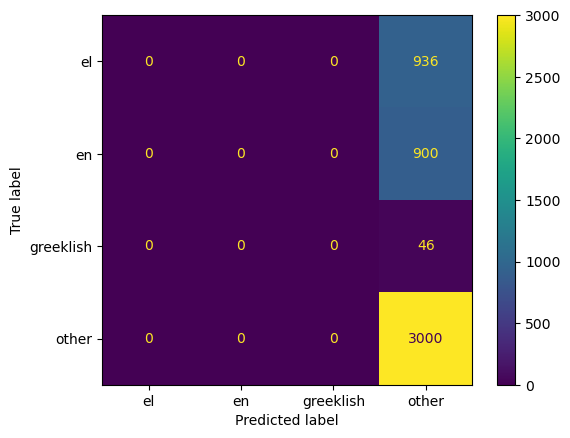

In [158]:
from sklearn.dummy import DummyClassifier, DummyRegressor


majority = DummyClassifier(strategy="most_frequent")
majority.fit(x_train, y_train)
majority_res = majority.predict(x_test)

get_statistics(y_test, majority_res)

### Regex Classification

In [159]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    regex_model = RegexClassifier()
    res = cross_val_res(regex_model, data_train.text, y_train, scoring="f1_macro")
    print(f"Regex Classifier mean macro F1: {res[0]:.4f}, std: {res[1]:.4f}")

Regex Classifier mean macro F1: 0.5117, std: 0.5053


Macro F1: 0.5148711759461488
              precision    recall  f1-score   support

          el       1.00      1.00      1.00       936
          en       0.33      1.00      0.49       900
   greeklish       0.00      0.00      0.00        46
       other       1.00      0.40      0.57      3000

    accuracy                           0.62      4882
   macro avg       0.58      0.60      0.51      4882
weighted avg       0.87      0.62      0.63      4882



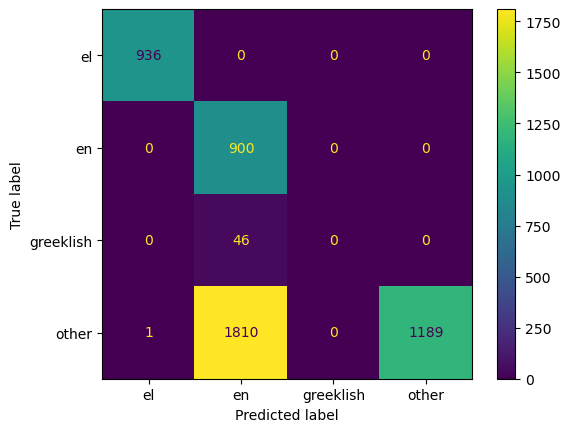

In [160]:
regex_model = RegexClassifier(include_greeklish=True).fit(data_train.text, y_train)
regex_res = regex_model.predict(data_test.text)
get_statistics(y_test, regex_res)

### Logistic Regression

In [161]:
from sklearn.linear_model import LogisticRegression


with warnings.catch_warnings():
    # ignore warnings about deprecated methods in libraries
    warnings.simplefilter("ignore")

    lr = LogisticRegression(max_iter=1000)
    res = cross_val_res(lr, x_train, y_train)
    print(f"Logistic Regression mean macro F1-score {res[0]:.4f}, std: {res[1]:.4f}")

Logistic Regression mean macro F1-score 0.8149, std: 0.8535


Macro F1: 0.894780192672954
              precision    recall  f1-score   support

          el       1.00      0.94      0.97       936
          en       0.99      0.97      0.98       900
   greeklish       1.00      0.48      0.65        46
       other       0.97      1.00      0.98      3000

    accuracy                           0.98      4882
   macro avg       0.99      0.85      0.89      4882
weighted avg       0.98      0.98      0.98      4882



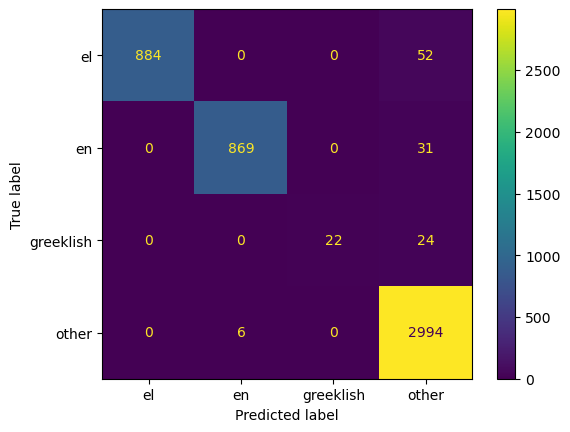

In [162]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    lr = LogisticRegression(max_iter=1000).fit(x_train, y_train)
    lr_res = lr.predict(x_test)

get_statistics(y_test, lr_res)

In [175]:
from sklearn.ensemble import RandomForestClassifier


forest_model = RandomForestClassifier(n_estimators=50, 
                                      n_jobs=-1, 
                                      criterion="entropy")
res = cross_val_res(forest_model, x_train, y_train, cv=3)
print(f"Random Forest mean macro F1: {res[0]:.4f}, std: {res[1]:.4f}")

Random Forest mean macro F1: 0.9204, std: 0.9572


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   19.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


Macro F1: 0.9671805092315233
              precision    recall  f1-score   support

          el       1.00      0.99      0.99       936
          en       0.98      1.00      0.99       900
   greeklish       0.97      0.83      0.89        46
       other       0.99      0.99      0.99      3000

    accuracy                           0.99      4882
   macro avg       0.99      0.95      0.97      4882
weighted avg       0.99      0.99      0.99      4882



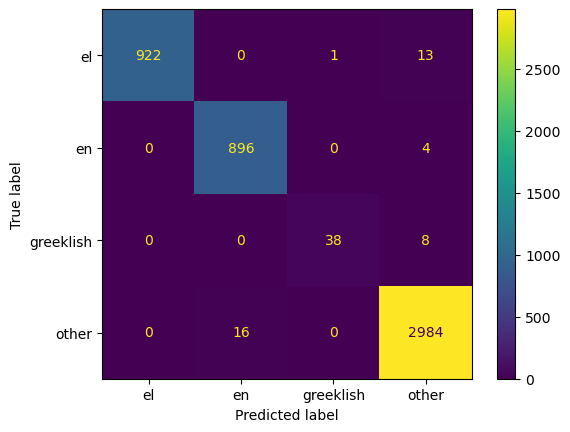

In [176]:
from sklearn.ensemble import RandomForestClassifier


forest_model = RandomForestClassifier(n_estimators=100, 
                                      n_jobs=-1, 
                                      criterion="entropy", 
                                      verbose=1).fit(x_train, y_train)
forest_pred = forest_model.predict(x_test)
get_statistics(y_test, forest_pred)

### Adaboost

In [178]:
from sklearn.ensemble import AdaBoostClassifier


ada_model = AdaBoostClassifier(n_estimators=50)
res = cross_val_res(ada_model, x_train, y_train, cv=3)
print(f"AdaBoost mean macro F1: {res[0]:.4f}, std: {res[1]:.4f}")

AdaBoost mean macro F1: 0.8448, std: 0.8997


Macro F1: 0.9076711010956788
              precision    recall  f1-score   support

          el       0.99      0.93      0.96       936
          en       0.99      0.94      0.96       900
   greeklish       0.96      0.59      0.73        46
       other       0.96      1.00      0.98      3000

    accuracy                           0.97      4882
   macro avg       0.98      0.86      0.91      4882
weighted avg       0.97      0.97      0.97      4882



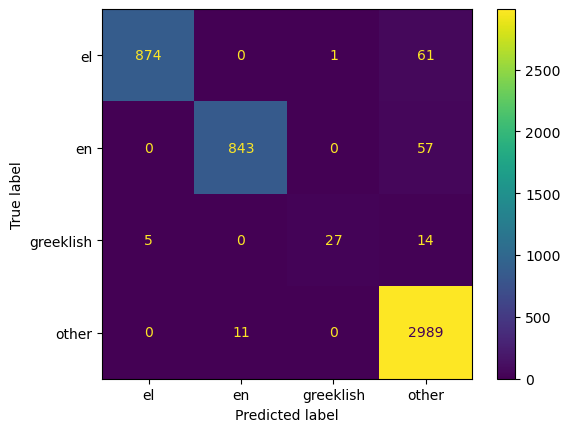

In [179]:
ada_model = AdaBoostClassifier(n_estimators=100).fit(x_train, y_train)
ada_pred = ada_model.predict(x_test)
get_statistics(y_test, ada_pred)

In [180]:
missed = y_test != ada_pred
pd.DataFrame({"predicted": ada_pred[missed], "actual": data_test[missed].labels, "text": data_test[missed].text})

predicted     actual  \
3598        other         el   
3279        other         en   
6494        other         el   
8423        other         en   
5526        other         el   
...           ...        ...   
6290        other         el   
2010        other         en   
4468        other         en   
2558328        el  greeklish   
6382        other         en   

                                                      text  
3598     Œü Œì. Œ†ŒπœÑ Œ≠œáŒµŒπ ŒµŒ∫Œ±œÑŒøŒΩœÑŒ¨Œ¥ŒµœÇ œÄŒ±œÅŒ±ŒªŒØŒµœÇ , Œ±œÄœå ŒºŒπŒ∫œÅŒø...  
3279                       Didn't last a week after using.  
6494                         ŒïŒπœÇ Œ≤Œ¨œÅŒøœÇ œÑŒ∑œÇ ŒºŒµœÉŒ±ŒØŒ±œÇ œÑŒ¨ŒæŒ∑œÇ .  
8423     It already stopped working. It no longer charges.  
5526                        Œü ' ŒªœÜœÅŒµŒΩœÑ ŒØŒ≥Œ∫ŒªŒ∏ŒøœÅœÄ , œÜœÖœÉŒπŒ∫Œ¨ !  
...                                                    ...  
6290                         ŒöœçœÅŒπŒµ , ŒºŒøœÖ œáŒ¨ŒªŒ±œÉŒµœÇ œÑŒ∑ ŒºŒ≠œÅŒ± .  
2010     if something spills inside it will leak if you...  
4468                                Similar to other books  
2558328                    ti 8a kanete kamia guild h mpa?  
6382                         Very little but it looks nice  

[149 rows x 3 columns]

In [181]:
missed = y_test != forest_pred
pd.DataFrame({"predicted": forest_pred[missed], "actual": data_test[missed].labels, "text": data_test[missed].text})

predicted     actual  \
5526         other         el   
2954         other         el   
259          other         el   
3146630      other  greeklish   
2486513      other  greeklish   
2454693      other  greeklish   
765          other         el   
2968333      other  greeklish   
2843005      other  greeklish   
2877428      other  greeklish   
10673           en      other   
6894         other         en   
916          other         el   
21504           en      other   
2617         other         el   
19972           en      other   
15516           en      other   
12092           en      other   
18011           en      other   
2792275      other  greeklish   
13038           en      other   
21399           en      other   
3200         other         el   
5380         other         el   
3100558      other  greeklish   
19184           en      other   
10909           en      other   
3361         other         en   
964          other         el   
2733         other         el   
4903         other         el   
2980187  greeklish         el   
14691           en      other   
21359           en      other   
23617           en      other   
15772           en      other   
11888           en      other   
9076            en      other   
6345         other         el   
1865         other         en   
8450         other         el   
4468         other         en   

                                                      text  
5526                        Œü ' ŒªœÜœÅŒµŒΩœÑ ŒØŒ≥Œ∫ŒªŒ∏ŒøœÅœÄ , œÜœÖœÉŒπŒ∫Œ¨ !  
2954                                        ŒëŒ∫œåŒºŒ± ŒøŒ¥Œ∑Œ≥ŒµŒØ .  
259                              ŒïŒ∏ŒΩŒπŒ∫œå ŒäŒ¥œÅœÖŒºŒ± ŒïœÄŒπœÉœÑŒ∑ŒºœéŒΩ .  
3146630          tha pexete season 3 gt endiaferome na mpo  
2486513                       8a apanthsei kaneis ti fasi?  
2454693  aloha mages tha borouse kaneis na me helparei ...  
765                               Œ†œÅŒøŒ∫Œ¨ŒªŒµœÉŒµ Œ∫Œ¨œÄŒøŒπŒ± Œ∂Œ∑ŒºŒπŒ¨ .  
2968333                                     aoua aoua aoua  
2843005  Resto Shaman twra kanw gear up 3.1k gs Name:Je...  
2877428       kalos private aksizei na ksekiniseis paidia?  
10673            Snowden Hits Hurdles in Search for Asylum  
6894                                disappointed in lenght  
916                                   ŒëœÅŒ∫ŒµœÑŒ¨ œÖœÄŒøŒΩŒøŒøœçŒºŒµŒΩŒ± .  
21504    Grim family yeah and they have some some succe...  
2617                                   ŒïŒΩœÑŒ¨ŒæŒµŒπ , Œ∑œÅŒ≠ŒºŒ∑œÉŒµ .  
19972        Portugal Drownings: UK Girl And Grandad Named  
15516    Naam , mtu alisema kwamba , lazima kuna aina f...  
12092    ‡§è‡§Æ‡§ø‡§≤‡•Ä ‡§°‡§ø‡§ï‡§ø‡§Ç‡§∏‡§® ‡§ï‡•Ä ‡§ï‡§µ‡§ø‡§§‡§æ All I Really Need to Kn...  
18011    Yeah it ' s maybe if she doesn ' t she kwa ura...  
2792275  Meta to xtesino mas raid  ICC25  exume 8/12hc ...  
13038    Well i hate to cut this short but i think afad...  
21399    Not all fat is a paunch ni hatari zaidi kuliko...  
3200                                             ŒëœÄŒØŒ∏Œ±ŒΩŒø .  
5380                                      Œ§Œ≠œáŒΩŒ∑ œÄŒªŒ±œÉŒ¨œÅŒπœÉŒºŒ±  
3100558  80lvl Beast master Hunter pros to paron  3.5 G...  
19184    Oh really well nikiwa england years ago na nik...  
10909    Oba dokumenty sƒÖ dzi≈õ publikowane w New Englan...  
3361                              Snap kept coming undone.  
964                                               ŒìŒøœÖŒªŒπŒ¨ .  
2733                                       Œ£ ' ŒµœÖœáŒ±œÅŒπœÉœÑœé .  
4903                                    ŒîŒπŒµŒæŒÆœáŒ∏Œ∑ œÉŒπœâœÄŒ∑ŒªŒ¨ .  
2980187  Olympian Heroes ŒµŒªŒªŒ∑ŒΩŒπŒ∫œå guild œàŒ¨œáŒΩŒµŒπ Œ∫œåœÉŒºŒø Œ≥Œπ...  
14691    Um that ' s what i like that ' s what i like t...  
21359    Right and he always and uh alikuwa na shida sa...  
23617    The highlands of the highlands of the. of the ...  
15772                                    Nimependa the man  
11888    We were just kunywea all the time finally what...  
9076       Ati wamama that ' s what they say that ' s

In [182]:
print(f"Notebook executed in {int((time()-start)// 60)} minutes and {(time()-start) % 60:.1f} seconds")

Notebook executed in 23 minutes and 31.3 seconds
